In [ ]:
import numpy as np
from numpy import loadtxt
dataset = loadtxt(r'/content/drive/MyDrive/TreeClassifierData.csv',delimiter=',',skiprows=1)
#Split into input (X) and output (y) variables
X = dataset[:,0:3]    #X is the data
y = dataset[:,3]      #y is the label
from sklearn.model_selection import train_test_split
#Split the data into training and testing sets (100 for training, 50 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =50)

# random_state is used if we want to obtain the same random split each time when we run the code.
# We can remove the random_state parameter if we don't need reproducibility.
# One-hot encode the target labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#Building the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

# Define the early stopping and model checkpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

#Compiling the Model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Preparing the Validation Data
x_val = X_train[:20]
partial_x_train= X_train[20:]
y_val = y_train[:20]
partial_y_train = y_train[20:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=60,
                    batch_size=4,
                    validation_data=(x_val,y_val))



Epoch 1/60
20/20 [==============================] - 3s 55ms/step - loss: 0.8745 - accuracy: 0.6750 - val_loss: 0.9029 - val_accuracy: 0.5000
Epoch 2/60
20/20 [==============================] - 0s 13ms/step - loss: 0.6515 - accuracy: 0.7500 - val_loss: 0.7221 - val_accuracy: 0.5000
Epoch 3/60
20/20 [==============================] - 0s 16ms/step - loss: 0.5271 - accuracy: 0.8625 - val_loss: 0.6234 - val_accuracy: 0.7000
Epoch 4/60
20/20 [==============================] - 0s 13ms/step - loss: 0.4350 - accuracy: 0.9125 - val_loss: 0.4889 - val_accuracy: 0.9500
Epoch 5/60
20/20 [==============================] - 0s 11ms/step - loss: 0.3666 - accuracy: 0.9250 - val_loss: 0.4028 - val_accuracy: 1.0000
Epoch 6/60
20/20 [==============================] - 0s 18ms/step - loss: 0.3060 - accuracy: 0.9500 - val_loss: 0.3369 - val_accuracy: 1.0000
Epoch 7/60
20/20 [==============================] - 0s 10ms/step - loss: 0.2489 - accuracy: 0.9875 - val_loss: 0.3237 - val_accuracy: 0.9500
Epoch 8/60
20

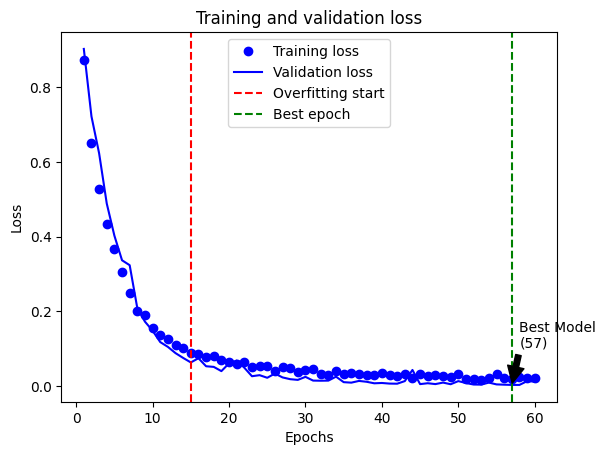

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
overfitting_start_epoch = np.argmax(np.diff(val_loss) > 0) + 1

# Determine the best epoch based on the lowest validation loss
best_epoch = np.argmin(val_loss) + 1
best_val_loss = val_loss[best_epoch - 1]

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axvline(x=overfitting_start_epoch, color='r', linestyle='--', label='Overfitting start')

# Annotate the best epoch
plt.axvline(x=best_epoch, color='g', linestyle='--', label='Best epoch')
plt.annotate(f'Best Model\n({best_epoch})',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch + 1, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from numpy import loadtxt

In [ ]:
dataset = loadtxt(r'/content/drive/MyDrive/TreeClassifierData.csv',delimiter=',',skiprows=1)

In [ ]:
#Split into input (X) and output (y) variables
X = dataset[:,0:3]    #X is the data
y = dataset[:,3]      #y is the label
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into training and testing sets (100 for training, 50 for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =50)

In [ ]:
# random_state is used if we want to obtain the same random split each time when we run the code.
# We can remove the random_state parameter if we don't need reproducibility.
# One-hot encode the target labels
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#Building the network 2
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model1 = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(3,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])
# Define the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

model1_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

In [ ]:
#Compiling the Model
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Preparing the Validation Data
x_val = X_train[:20]
partial_x_train= X_train[20:]
y_val = y_train[:20]
partial_y_train = y_train[20:]
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=70,
                    batch_size=20,
                    validation_data=(x_val,y_val),
                    callbacks=[early_stopping, model1_checkpoint])

Epoch 1/70
1/4 [======>.......................] - ETA: 3s - loss: 1.1363 - accuracy: 0.3000
Epoch 1: val_loss improved from inf to 0.89981, saving model to best_model.h5
4/4 [==============================] - 1s 115ms/step - loss: 1.0456 - accuracy: 0.6125 - val_loss: 0.8998 - val_accuracy: 0.8500
Epoch 2/70
1/4 [======>.......................] - ETA: 0s - loss: 0.9161 - accuracy: 0.8000
Epoch 2: val_loss improved from 0.89981 to 0.78885, saving model to best_model.h5
4/4 [==============================] - 0s 33ms/step - loss: 0.8867 - accuracy: 0.6500 - val_loss: 0.7888 - val_accuracy: 1.0000
Epoch 3/70
1/4 [======>.......................] - ETA: 0s - loss: 0.8287 - accuracy: 0.9000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.78885 to 0.68047, saving model to best_model.h5
4/4 [==============================] - 0s 33ms/step - loss: 0.7901 - accuracy: 0.8625 - val_loss: 0.6805 - val_accuracy: 0.9500
Epoch 4/70
1/4 [======>.......................] - ETA: 0s - loss: 0.8038 - accuracy: 0.9500
Epoch 4: val_loss improved from 0.68047 to 0.58409, saving model to best_model.h5
4/4 [==============================] - 0s 27ms/step - loss: 0.6929 - accuracy: 0.9375 - val_loss: 0.5841 - val_accuracy: 0.9000
Epoch 5/70
1/4 [======>.......................] - ETA: 0s - loss: 0.5694 - accuracy: 1.0000
Epoch 5: val_loss improved from 0.58409 to 0.52670, saving model to best_model.h5
4/4 [==============================] - 0s 27ms/step - loss: 0.6185 - accuracy: 0.8750 - val_loss: 0.5267 - val_accuracy: 0.9000
Epoch 6/70
1/4 [======>.......................] - ETA: 0s - loss: 0.6081 - accuracy: 0.9500
Epoch 6: val_loss improved from 0.52670 to 0.47066, saving model to best_model.h5
4/4 [======

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
overfitting_start_epoch = np.argmax(np.diff(val_loss) > 0) + 1

In [ ]:
# Determine the best epoch based on the lowest validation loss
best_epoch = np.argmin(val_loss) + 1
best_val_loss = val_loss[best_epoch - 1]

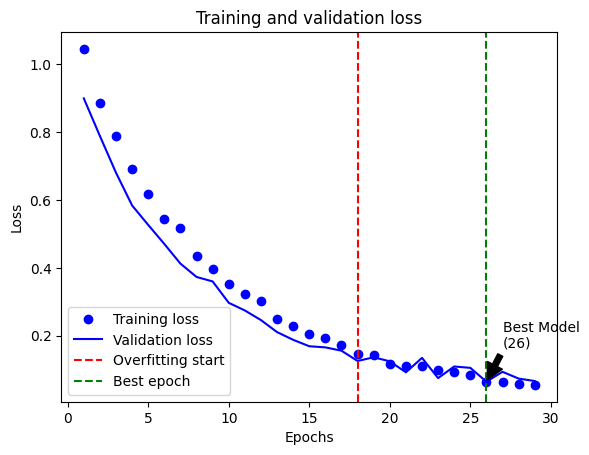

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.axvline(x=overfitting_start_epoch, color='r', linestyle='--', label='Overfitting start')

# Annotate the best epoch
plt.axvline(x=best_epoch, color='g', linestyle='--', label='Best epoch')
plt.annotate(f'Best Model\n({best_epoch})',
             xy=(best_epoch, best_val_loss),
             xytext=(best_epoch + 1, best_val_loss + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

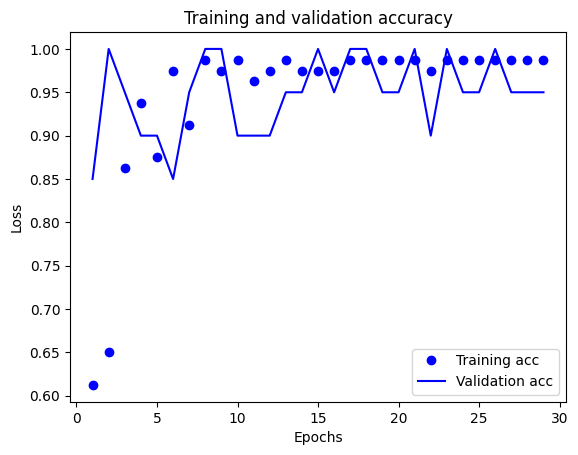

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from keras.models import load_model
best_model = load_model('best_model.h5')
best_model

In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

2/2 [==============================] - 1s 16ms/step - loss: 0.0658 - accuracy: 1.0000
Test Loss: 0.06582918018102646, Test Accuracy: 1.0


In [ ]:
#Building the network 3 for low capacity model (Experiment)
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

NameError: name 'X_train' is not defined

In [ ]:
#Preparing the Validation Data
x_val = X_train[:20]
partial_x_train= X_train[20:]
y_val = y_train[:20]
partial_y_train = y_train[20:]

NameError: name 'X_train' is not defined